# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

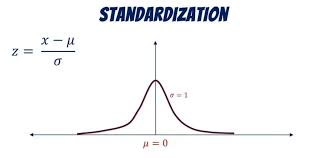


In [ ]:
import pandas as pd
import numpy as np



df = pd.read_csv("SA_heart.csv")

print(df.head())
print(df.columns)
print(df.describe())

   ind    sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0    1  160.0    12.00  5.73      23.11  Present     49    25.30    97.20   
1    2  144.0     0.01  4.41      28.61   Absent     55      NaN     2.06   
2    3  118.0     0.08  3.48      32.28  Present     52    29.14     3.81   
3    4  170.0     7.50  6.41      38.03  Present     51    31.99    24.26   
4    5  134.0    13.60  3.50      27.78  Present     60    25.99    57.34   

   age  chd  
0   52  1.0  
1   63  1.0  
2   46  0.0  
3   58  1.0  
4   49  1.0  
Index(['ind', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')
              ind         sbp     tobacco         ldl   adiposity       typea  \
count  462.000000  419.000000  441.000000  462.000000  462.000000  462.000000   
mean   231.935065  138.312649    3.569116    4.740325   25.406732   53.103896   
std    133.938585   20.286468    4.535471    2.070909    7.780699    9.8

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ind        462 non-null    int64  
 1   sbp        419 non-null    float64
 2   tobacco    441 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    441 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    436 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        449 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 39.8+ KB


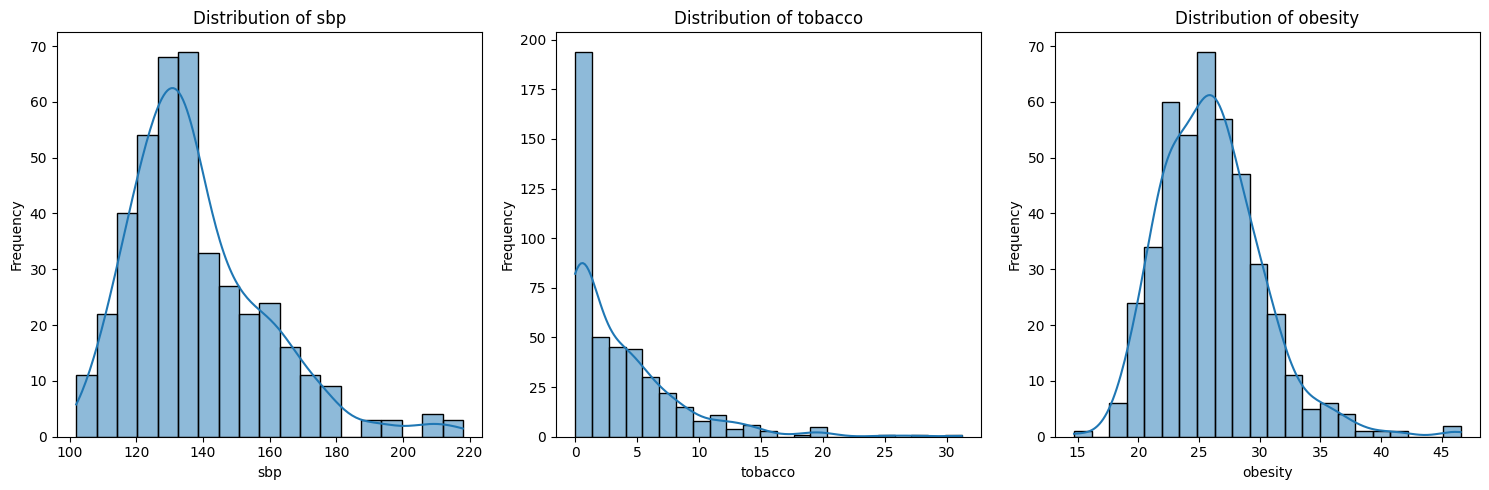

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distributions of sbp, tobacco, and obesity after imputation
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['sbp'], kde=True)
plt.title('Distribution of sbp')
plt.xlabel('sbp')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['tobacco'], kde=True)
plt.title('Distribution of tobacco')
plt.xlabel('tobacco')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['obesity'], kde=True)
plt.title('Distribution of obesity')
plt.xlabel('obesity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
df['tobacco'].fillna(df['tobacco'].median(), inplace=True)
df['sbp'].fillna(df['sbp'].median(), inplace=True)
df['obesity'].fillna(df['obesity'].mean(), inplace=True)
df.dropna(subset=['chd'], inplace=True)
df['famhist'].fillna(df['famhist'].mode()[0], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ind        449 non-null    int64  
 1   sbp        449 non-null    float64
 2   tobacco    449 non-null    float64
 3   ldl        449 non-null    float64
 4   adiposity  449 non-null    float64
 5   famhist    449 non-null    object 
 6   typea      449 non-null    int64  
 7   obesity    449 non-null    float64
 8   alcohol    449 non-null    float64
 9   age        449 non-null    int64  
 10  chd        449 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 42.1+ KB


/tmp/ipython-input-834562748.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tobacco'].fillna(df['tobacco'].median(), inplace=True)
/tmp/ipython-input-834562748.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'ind' in numeric_cols:
    numeric_cols.remove('ind')

In [ ]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
standardized_data = df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std(), axis=0) # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
standardized_data[:5]  # Display the first few rows of standardized data

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,1.166335,1.911843,0.468776,-0.281518,-0.412890,-0.161955,3.235467,0.632012,1.382504
1,0.330863,-0.781649,-0.163010,0.422819,0.194938,0.017176,-0.613794,1.382915,1.382504
2,-1.026779,-0.765924,-0.608132,0.892805,-0.108976,0.775697,-0.542991,0.222428,-0.721714
3,1.688505,0.900941,0.794242,1.629158,-0.210281,1.471610,0.284394,1.041595,1.382504
4,-0.191307,2.271275,-0.598560,0.316528,0.701462,0.006529,1.622775,0.427220,1.382504


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [ ]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)  # Calculate covariance matrix
cov_matrix

array([[ 1.        ,  0.20619597,  0.19658304,  0.34777761, -0.07297802,
         0.24272883,  0.13324986,  0.34879963,  0.15691436],
       [ 0.20619597,  1.        ,  0.1566913 ,  0.27536738, -0.01346318,
         0.10700807,  0.19180512,  0.43560141,  0.31217204],
       [ 0.19658304,  0.1566913 ,  1.        ,  0.44861456,  0.04107768,
         0.3243774 , -0.03184195,  0.31823304,  0.26637515],
       [ 0.34777761,  0.27536738,  0.44861456,  1.        , -0.05206327,
         0.69258469,  0.10421675,  0.63519047,  0.27052824],
       [-0.07297802, -0.01346318,  0.04107768, -0.05206327,  1.        ,
         0.05473122,  0.04174673, -0.10126547,  0.11055131],
       [ 0.24272883,  0.10700807,  0.3243774 ,  0.69258469,  0.05473122,
         1.        ,  0.06325025,  0.29612602,  0.10717124],
       [ 0.13324986,  0.19180512, -0.03184195,  0.10421675,  0.04174673,
         0.06325025,  1.        ,  0.10364667,  0.06689445],
       [ 0.34879963,  0.43560141,  0.31823304,  0.63519047, -0

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [ ]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # Perform eigendecomposition
eigenvalues, eigenvectors

(array([0.18957153, 0.47961892, 0.6137004 , 0.68162052, 0.75378567,
        0.99955349, 1.10246362, 1.20040987, 2.97927599]),
 array([[ 0.00881036, -0.11837459,  0.03733655,  0.03172142,  0.88194837,
         -0.16612531,  0.2794193 ,  0.0590157 , -0.31067831],
        [ 0.04454597, -0.37843405,  0.53078422,  0.37419653, -0.21008185,
          0.15541838,  0.02957141,  0.51939888, -0.30677268],
        [-0.08502993,  0.01479051,  0.5162278 , -0.66281289,  0.01499725,
          0.20782949, -0.22795566, -0.27569656, -0.33963023],
        [ 0.76636053,  0.13344656, -0.12258704,  0.11431268, -0.18505755,
         -0.11585335,  0.05349401, -0.26254234, -0.49732304],
        [ 0.03621972,  0.22446815,  0.1373278 ,  0.28687395,  0.22893466,
         -0.28434445, -0.84349097,  0.04714496,  0.01356762],
        [-0.47906035, -0.42866938, -0.15752102,  0.21480117, -0.20266797,
         -0.35110338, -0.05548817, -0.45838245, -0.3718199 ],
        [-0.02577722,  0.07479007, -0.06021249, -0.4364228

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [ ]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
sorted_eigenvectors

array([[-0.31067831,  0.0590157 ,  0.2794193 , -0.16612531,  0.88194837,
         0.03172142,  0.03733655, -0.11837459,  0.00881036],
       [-0.30677268,  0.51939888,  0.02957141,  0.15541838, -0.21008185,
         0.37419653,  0.53078422, -0.37843405,  0.04454597],
       [-0.33963023, -0.27569656, -0.22795566,  0.20782949,  0.01499725,
        -0.66281289,  0.5162278 ,  0.01479051, -0.08502993],
       [-0.49732304, -0.26254234,  0.05349401, -0.11585335, -0.18505755,
         0.11431268, -0.12258704,  0.13344656,  0.76636053],
       [ 0.01356762,  0.04714496, -0.84349097, -0.28434445,  0.22893466,
         0.28687395,  0.1373278 ,  0.22446815,  0.03621972],
       [-0.3718199 , -0.45838245, -0.05548817, -0.35110338, -0.20266797,
         0.21480117, -0.15752102, -0.42866938, -0.47906035],
       [-0.11679107,  0.4901396 ,  0.07005959, -0.70747685, -0.20085503,
        -0.43642282, -0.06021249,  0.07479007, -0.02577722],
       [-0.45492183,  0.1359024 ,  0.13619221,  0.18627388, -0

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
num_components = 2  # Decide on the number of principal components to keep (e.g., 2 for visualization)
principal_components = sorted_eigenvectors[:, :num_components] # Select the top 'num_components' eigenvectors
reduced_data = np.dot(standardized_data, principal_components)  # Project data onto the principal components
reduced_data[:5]

array([[-1.98816448,  3.19311494],
       [-0.98842187, -0.10400539],
       [ 0.20250542, -1.36196434],
       [-3.34734822, -0.02251341],
       [-1.37757569,  2.59395916]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (449, 2)


array([[-1.98816448,  3.19311494],
       [-0.98842187, -0.10400539],
       [ 0.20250542, -1.36196434],
       [-3.34734822, -0.02251341],
       [-1.37757569,  2.59395916]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

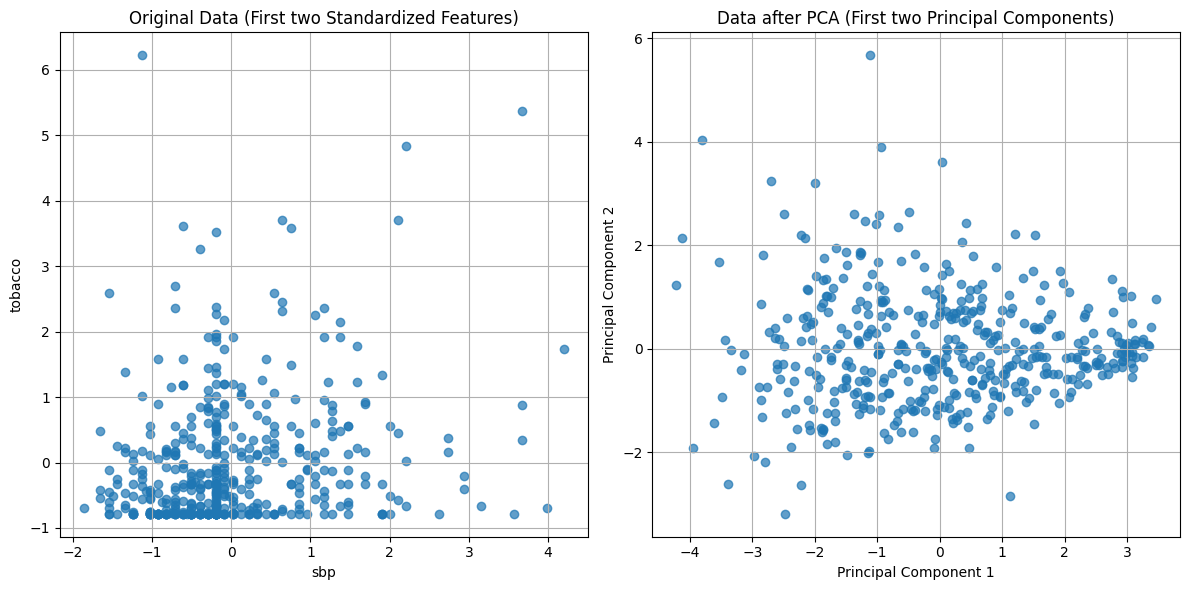

In [ ]:
import matplotlib.pyplot as plt

# Step 8: Visualize Before and After PCA

plt.figure(figsize=(12, 6))

# Plot original data (first two features for simplicity)
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.scatter(standardized_data.iloc[:, 0], standardized_data.iloc[:, 1], alpha=0.7)
plt.title('Original Data (First two Standardized Features)')
plt.xlabel(standardized_data.columns[0])
plt.ylabel(standardized_data.columns[1])
plt.grid(True)

# Plot reduced data after PCA
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7)
plt.title('Data after PCA (First two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()